In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from src.circle_detection.hough_circle_detection import hough_circle_detection
from src.data_utils.droplets_image_extractor import droplets_image_extractor


In [3]:
input_folders = ["datasets/droplets/train/original/",
                 "datasets/droplets/test/original/",
                 "datasets/droplets/whole/original/"]

output_folders = ["datasets/droplets/train/pd/",
                  "datasets/droplets/test/pd/",
                  "datasets/droplets/whole/pd/"]

for input_folder, output_folder in zip(input_folders, output_folders):

    input_files = os.listdir(input_folder)

    for input_file in input_files:
        image = cv2.imread(input_folder + input_file)

        image_gray = image[:, :, 0]

        circle_images = droplets_image_extractor(image_gray, hough_circle_detection, remove_background=False, border_circles_included=False)

        for id, circle_image in enumerate(circle_images):

            cv2.imwrite(f"{output_folder}{id}_{input_file}", circle_image)

{'maxRadius': 300, 'minRadius': 5, 'minDist': 10, 'param1': 200, 'param2': 100, 'dp': 0.2, 'method': 3}


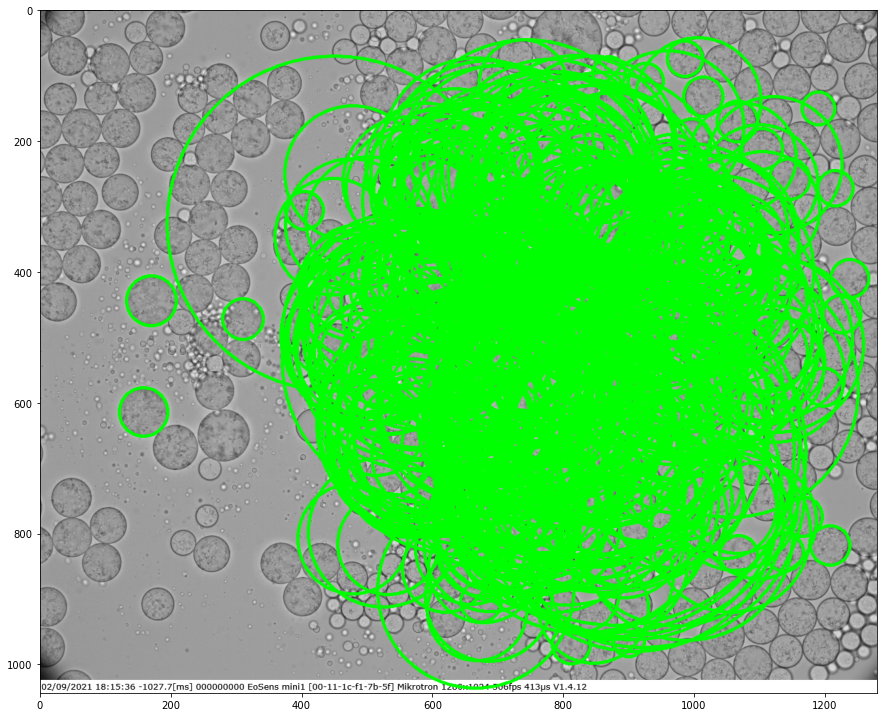

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

from src.circle_detection.hough_circle_detection import hough_circle_detection

image = cv2.imread('datasets/droplets/whole/original/bacteria-phage_control_5hrs_010000000000.jpg')
output = image.copy()
height, width = image.shape[:2]
maxRadius = 200
minRadius = 1

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(15,15))
plt.imshow(gray)

circles = hough_circle_detection(gray, hough_args = {"maxRadius": 300,
                                                     "minRadius": 5,
                                                     "minDist": 10,
                                                     "param1": 300,
                                                     "param2": 0.6,
                                                     "dp": 0.2,
                                                     "method": cv2.HOUGH_GRADIENT_ALT})

if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circlesRound = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circlesRound:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

    plt.imshow(output)
else:
    print ('No circles found')

error: OpenCV(4.5.4) /tmp/pip-req-build-kv0l0wqx/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


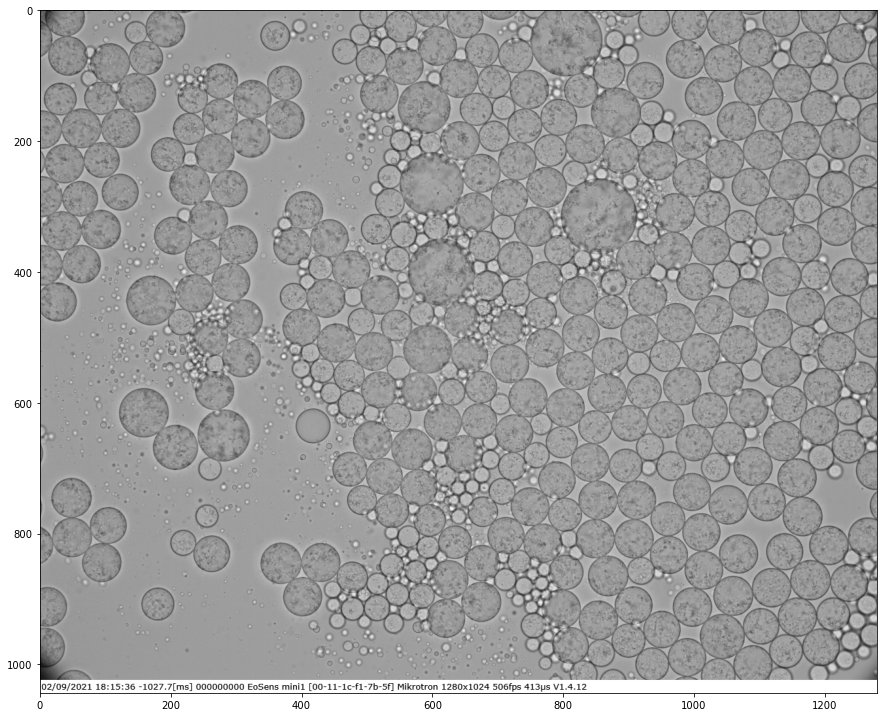

In [77]:
image = cv2.imread('datasets/droplets/whole/original/bacteria-phage_control_5hrs_010000000000.jpg')

#image = cv2.GaussianBlur(image.copy(), (27, 27), 0)
#image = cv2.Canny(image, 0, 130)


plt.figure(figsize=(15,15))
plt.imshow(image)

cnts, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    if(M["m00"] == 0):
        continue
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    #draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (125, 125, 125), 2)
    cv2.circle(image, (cX, cY), 3, (255, 255, 255), -1)
    
#plt.imshow(image)